<a href="https://colab.research.google.com/github/Bhoomikadayal/Capstone-4-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - **NETFLIX MOVIES AND TV SHOWS CLUSTERING** - Unsupervised ML Capstone Project

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Name** - Bhoomika Dayal
##### **Name** - Bhoomika Dayal

# **GitHub Link -**

Bhoomika Dayal - https://github.com/Bhoomikadayal/Capstone-4-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

NETFLIX.avif

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

Steps that are performed:

* Importing libraries
* Loading the dataset
* Shape of dataset
* Dataset information
* Handling the duplicate values
* Handling missing values.
* Undeerstanding the columns
* Variable description
* Data wrangling
* Data visualization
* Story telling and experimenting with charts.
* Text preprocessing,
* Latent Direchlet Allocation
* Sentiment analysis
* Challenges faced
* Conclusion.

# **Business Problem**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

## <b> Data Description </b>

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

## ***1. Know Your Data***
### Dataset Loading from google drive and Import Libraries

In [2]:
# mount the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data set from drive
df = pd.read_csv('/content/drive/MyDrive/capstone project - 4 (unsupervised)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 7787 rows and 12 columns.


### Dataset Rows & Columns count
it tells us that there is 7787 rows and 12 columns in that dataset

In [8]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# **Preprocessing the dataset**

* Deal with null/missing values
* Deal with duplicate data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# dataset duplicate value count
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


In [11]:
# checking null value
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df.isnull().sum().sum()

3631

* We found that there is no duplicates values in that data set.There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating.
* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data.


## ***Understanding Your Variables***

In [13]:
# Dataset columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Description of data. (i.e statistical values)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Type

In [15]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

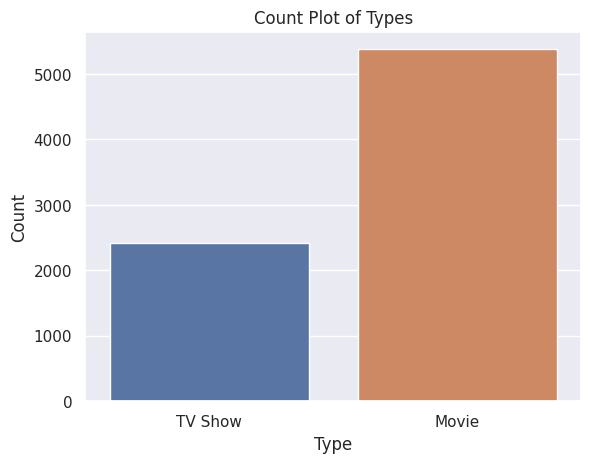

In [16]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Types')
plt.show()

Conclusion - Netflix has 5377 movies and 2410 TV shows, there are more number movies on Netflix than TV shows.

#### Chart - 2 - Rating

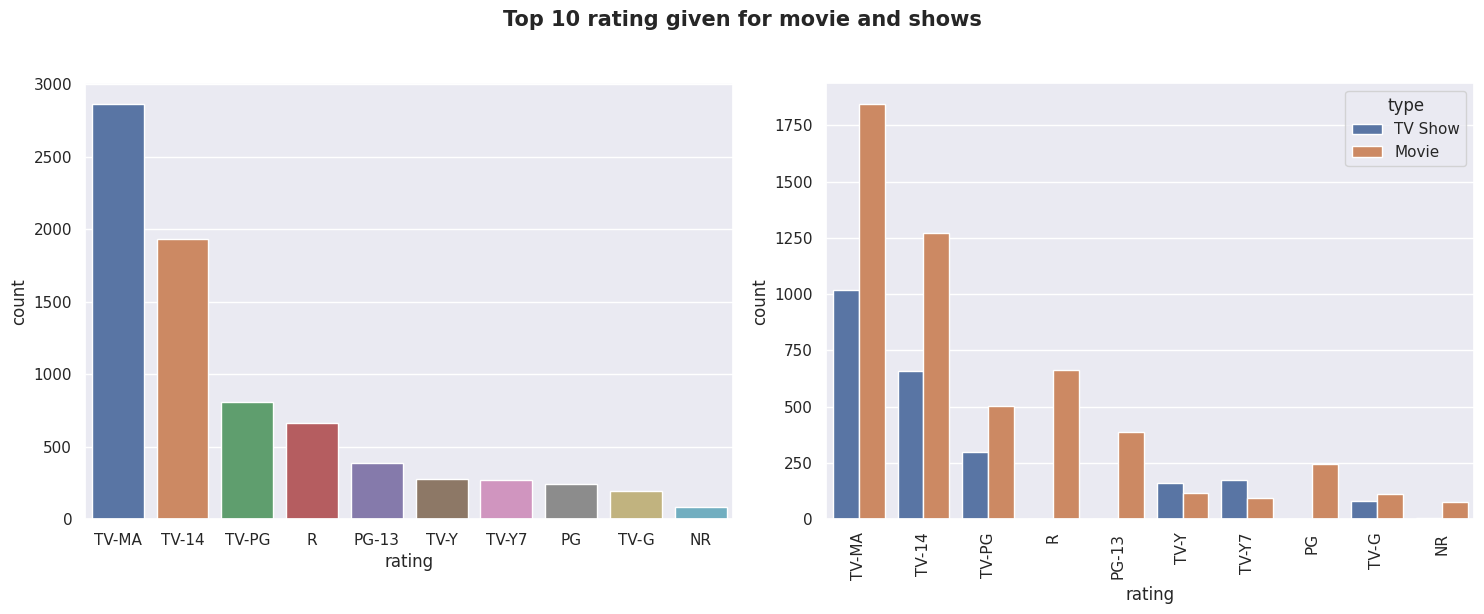

In [17]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations:

The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."

When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### Chart - 3 - Release year

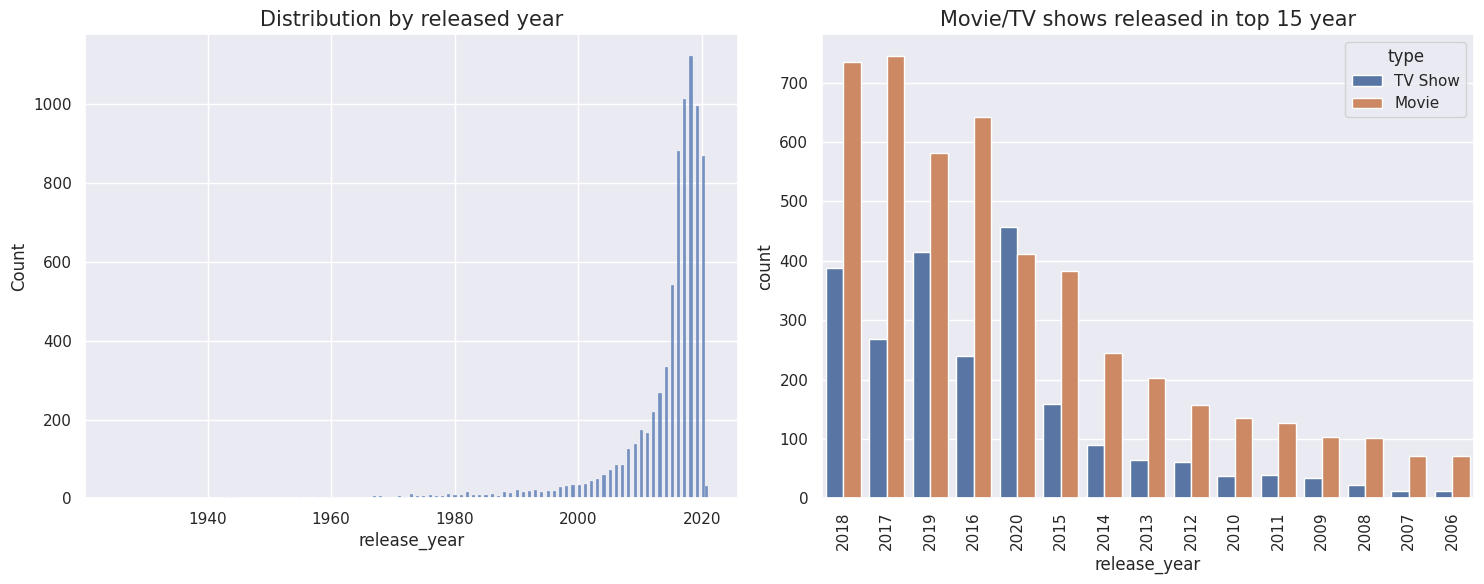

In [18]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Chart - 4 - Director

In [19]:
print(f"Number of Movies directed by directors are : {df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : {df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


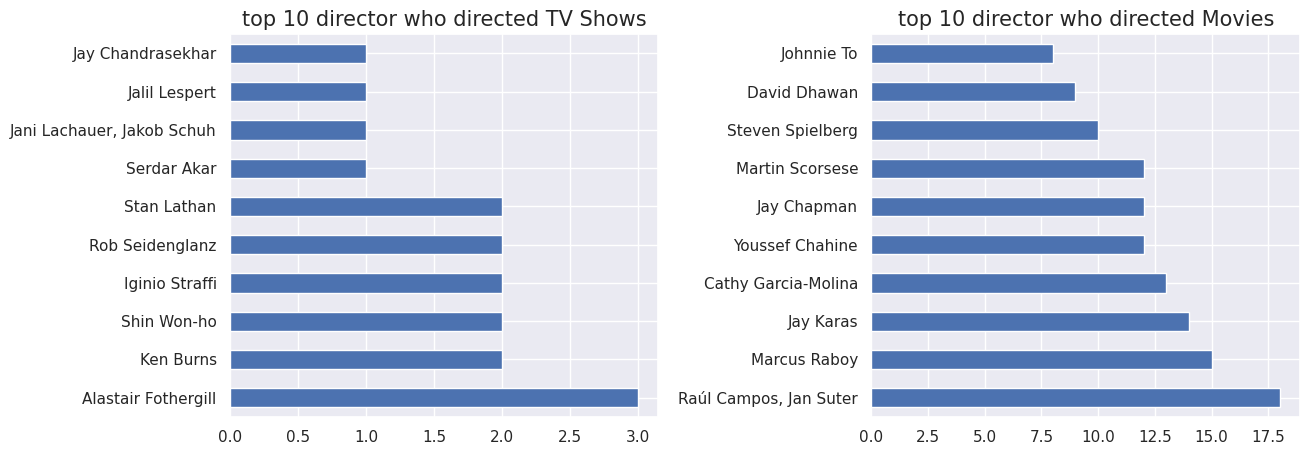

In [20]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

Conclusion:



1.   The three shows directed by Alastair Fothergill are the highest on the data list.
2. Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.




#### Chart - 5 - Cast

In [21]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


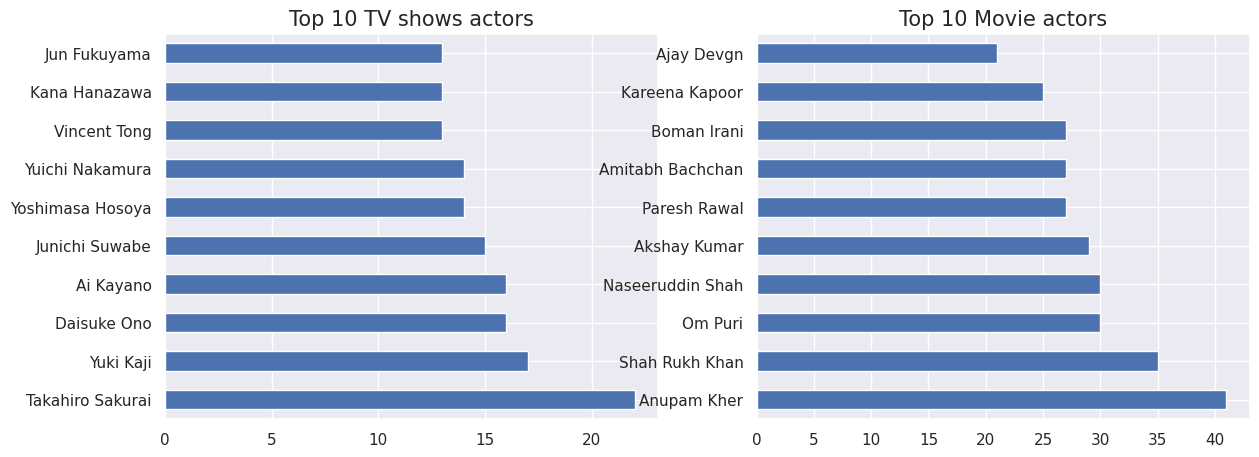

In [22]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)
plt.show()

Observations:

The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.

In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### Chart - 6 - Country

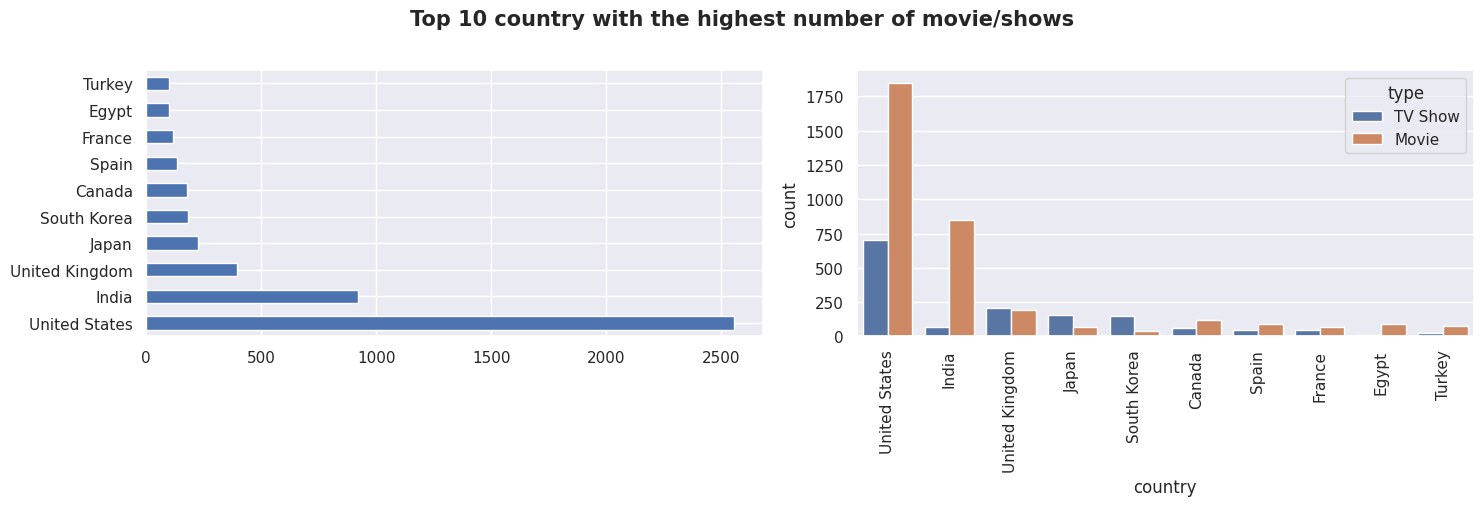

In [23]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observation:


The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.

In India and United State, a greater number of movies are present compared to TV shows.

In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

#### Chart - 7 - Country

In [24]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()


,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


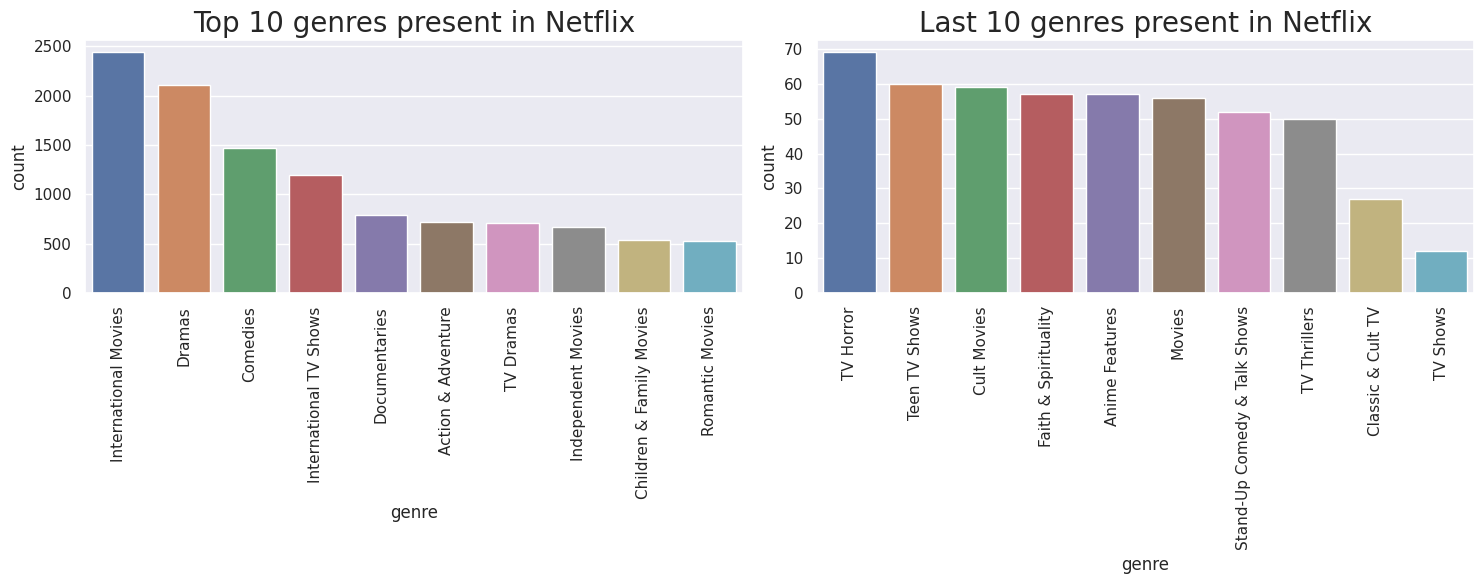

In [25]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations:

International Movies, Dramas, and Comedies make up the majority of the genres.
TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

#### Chart - 8 - Listed in

In [26]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

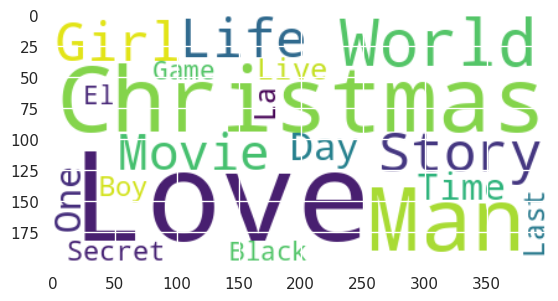

In [27]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()


Observation:

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

#### Chart - 9 - description

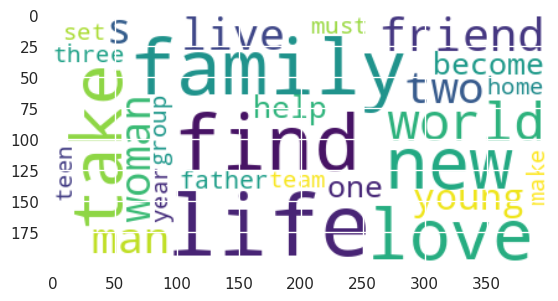

In [28]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

#Handling Outliers

<Axes: >

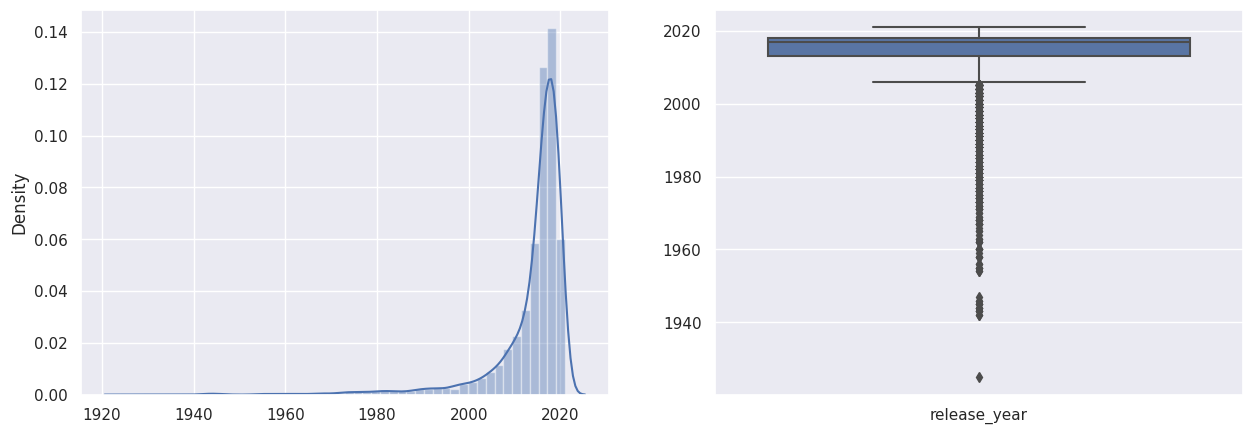

In [29]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])


Handling Outliers


Except for the release year, almost all of the data are presented in text format.

The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

#Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [30]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [31]:
path = '/content/drive/MyDrive/capstone project - 4 (unsupervised)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [32]:
data = pd.read_csv(path)

In [33]:
data.fillna('',inplace = True)

In [34]:
# Combining all the clustering attributes into a single column
data['clustering_attributes'] = (data['director'] + ' ' + data['cast'] +' ' + data['country'] +' ' + data['listed_in'] + ' ' + data['description'])

In [35]:
data['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

##Removing non-ASCII characters

In [36]:
import re

def remove_non_ascii(text):
    """
    Function to remove non-ASCII characters from a string.

    Args:
        text: A string containing text that may include non-ASCII characters.

    Returns:
        A new string where any non-ASCII characters have been removed.

    """
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Applying the remove_non_ascii function to the clustering_attributes column of the data DataFrame
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_non_ascii)


#### 1. Expand Contraction

In [37]:
pip install contractions --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.6 MB/s eta 0:00:00


In [38]:
import contractions

# Applying the contractions.fix() function to the clustering_attributes column of the data DataFrame
# This function replaces common contractions (e.g., "can't" => "cannot") with their expanded forms.

data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : contractions.fix(x))

#### 2. Lower Casing

In [39]:
# Lower Casing
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : x.lower())

#### 3. Removing Punctuations

In [40]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation using string.punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [41]:
# applying the remove_punctuation function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits
def remove_digits_urls(text):
    '''a function for removing digits and URLs from text'''
    # remove digits
    text = re.sub(r'\d+', '', text)
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # return text without digits and URLs
    return text

In [43]:
# applying the remove_digits_urls function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_digits_urls)

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords
# Defining the stop words to remove
stop_words = set(stopwords.words('english'))

# Defining a function to remove stop words from a given text
def remove_stopwords(text):
  # Splitting the text into individual words
    words = text.split()
    # Filtering out the stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Joining the filtered words back into a single string
    return ' '.join(filtered_words)

# Applying the remove_stopwords function to a column of text data
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_stopwords)

In [45]:
# Remove White spaces
#def remove_whitespace(text):
#    """Remove all white space from a text"""
#    return text.replace(" ", "")
#applying the remove_whitespace function to the clustering_attributes column
#data['clustering_attributes'] = data['clustering_attributes'].apply(remove_whitespace)

#### 7. Tokenization

In [46]:
data['clustering_attributes'][40]

'muharrem glmez erdem yener ayhan ta emin olcay muharrem glmez elif nur kerkk tark papuuolu suzan aksoy doa konakolu esin eden deniz zerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [47]:
# Tokenization
# Create an instance of the TweetTokenizer class
tokenizer = TweetTokenizer()
#Applying Tolenization
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
# Defining a function to lemmatize each token
def lemmatize_tokens(tokens):
    lem = WordNetLemmatizer()
    return [lem.lemmatize(token) for token in tokens]

#Applying Lemmitization
data['clustering_attributes'] = data['clustering_attributes'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?
I have used lemmatization as the text normalization technique because it reduces words to their base form, which can help with text analysis and understanding. It also helps to avoid duplication of words with different inflections, and makes it easier to perform analysis on the text. Additionally, lemmatization is more accurate than stemming as it uses a dictionary-based approach to identify the correct base form of a word.

In [49]:
# Extracting the column of text data to be used for clustering
clustering_data = data['clustering_attributes']

In [50]:
data['clustering_attributes']

0       [joo, miguel, bianca, comparato, michel, gomes...
1       [jorge, michel, grau, demin, bichir, hctor, bo...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fare, imad, creidi, antoinette, turk, ...
7783    [mozez, singh, vicky, kaushal, sarahjane, dia,...
7784    [nasty, c, documentary, international, movie, ...
7785    [adriano, zumbo, rachel, khoo, australia, inte...
7786    [sam, dunn, united, kingdom, canada, united, s...
Name: clustering_attributes, Length: 7787, dtype: object

In [51]:
type(clustering_data)

pandas.core.series.Series

In [52]:
# Converting the Pandas Series to a list of strings
doc_list = clustering_data.tolist()

#### 10. Text Vectorization

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert each list of strings in the Pandas Series to a single string
documents = [' '.join(strings) for strings in clustering_data]

# Create a TfidfVectorizer object with desired parameters
tfidf = TfidfVectorizer(stop_words='english', lowercase=False,max_features = 20000)

# Use fit_transform() method to transform the list of strings to a TF-IDF feature matrix
X = tfidf.fit_transform(documents)

# Print the vocabulary and TF-IDF vectors for each document
print("Vocabulary: ", tfidf.vocabulary_)
print(X.toarray())

Vocabulary:  {'joo': 8826, 'miguel': 11719, 'bianca': 1821, 'comparato': 3643, 'michel': 11693, 'gomes': 6756, 'rodolfo': 15155, 'oliveira': 12965, 'rafael': 14291, 'lozano': 10602, 'porto': 13912, 'mel': 11580, 'sergio': 16151, 'zez': 19940, 'celso': 2943, 'brazil': 2257, 'international': 8189, 'tv': 18462, 'drama': 5156, 'scifi': 15934, 'fantasy': 5985, 'future': 6410, 'elite': 5525, 'inhabit': 8108, 'island': 8318, 'paradise': 13269, 'far': 5986, 'crowded': 4068, 'slum': 16669, 'chance': 3034, 'join': 8790, 'saved': 15815, 'jorge': 8841, 'demin': 4553, 'bichir': 1830, 'hctor': 7215, 'bonilla': 2084, 'oscar': 13105, 'serrano': 16162, 'ortiz': 13099, 'carmen': 2791, 'beato': 1624, 'mexico': 11674, 'movie': 12048, 'devastating': 4693, 'earthquake': 5355, 'hit': 7509, 'city': 3396, 'trapped': 18265, 'survivor': 17280, 'walk': 19175, 'life': 10290, 'wait': 19164, 'rescued': 14829, 'trying': 18387, 'desperately': 4653, 'stay': 17002, 'alive': 574, 'gilbert': 6620, 'chan': 3032, 'stella': 

In [54]:
type(X)

scipy.sparse._csr.csr_matrix

In [55]:
X = X.toarray()

In [56]:
type(X)

numpy.ndarray

In [57]:
X.shape

(7787, 20000)

##### Which text vectorization technique have you used and why?
I have used because it is a statistical measure used to evaluate the importance of a word in a document or corpus. The TF-IDF score for a word is proportional to the frequency of the word in the document, but inversely proportional to the frequency of the word in the corpus.It not only captures the frequency of each word in the document but also takes into account the rarity of the word across the corpus.

#Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes dimensionality reduction is needed because it reduces computational complexity and improve the performance of machine learning algorithms also as the number of features or dimensions increases, the amount of data required to adequately represent the data also increases. This can lead to overfitting, a phenomenon known as the curse of dimensionality

In [58]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

In [59]:
# Perform PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

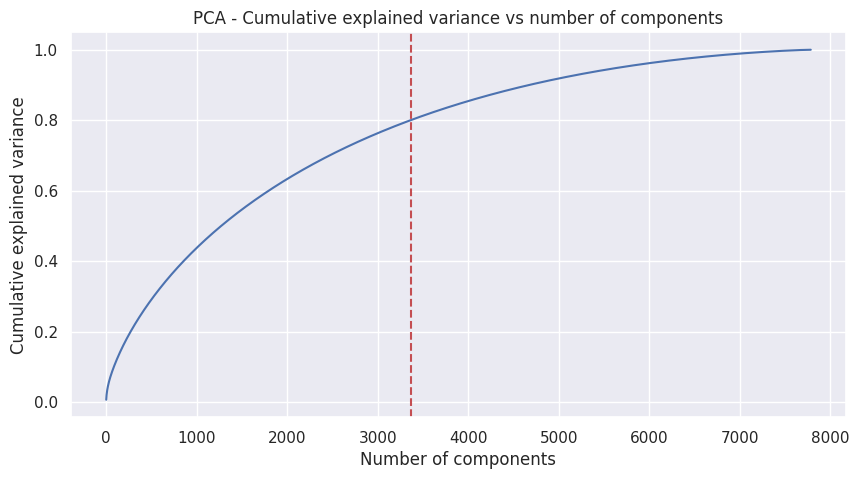


Number of components that explain 80% of the variance:  3364


In [60]:
# Explained variance for different number of components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1

# Plotting the cumulative explained variance vs number of components and marking component that shows around 90% Variance
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance)
plt.axvline(x=n_components, color='r', linestyle='--')
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print("")
print("Number of components that explain 80% of the variance: ", n_components)

In [61]:
# Initializing PCA with 3500 principal components
pca = PCA(n_components=3500, random_state=42)
# Fitting and transform the high-dimensional text data X into a lower-dimensional space using PCA
X_pca = pca.fit_transform(X)

In [62]:
X_pca.shape

(7787, 3500)

## ***ML Model Implementation***

### ML Model - 1

**K MEANS CLUSTERING**

In [63]:
# Importing necessary libraries
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, AffinityPropagation, estimate_bandwidth, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

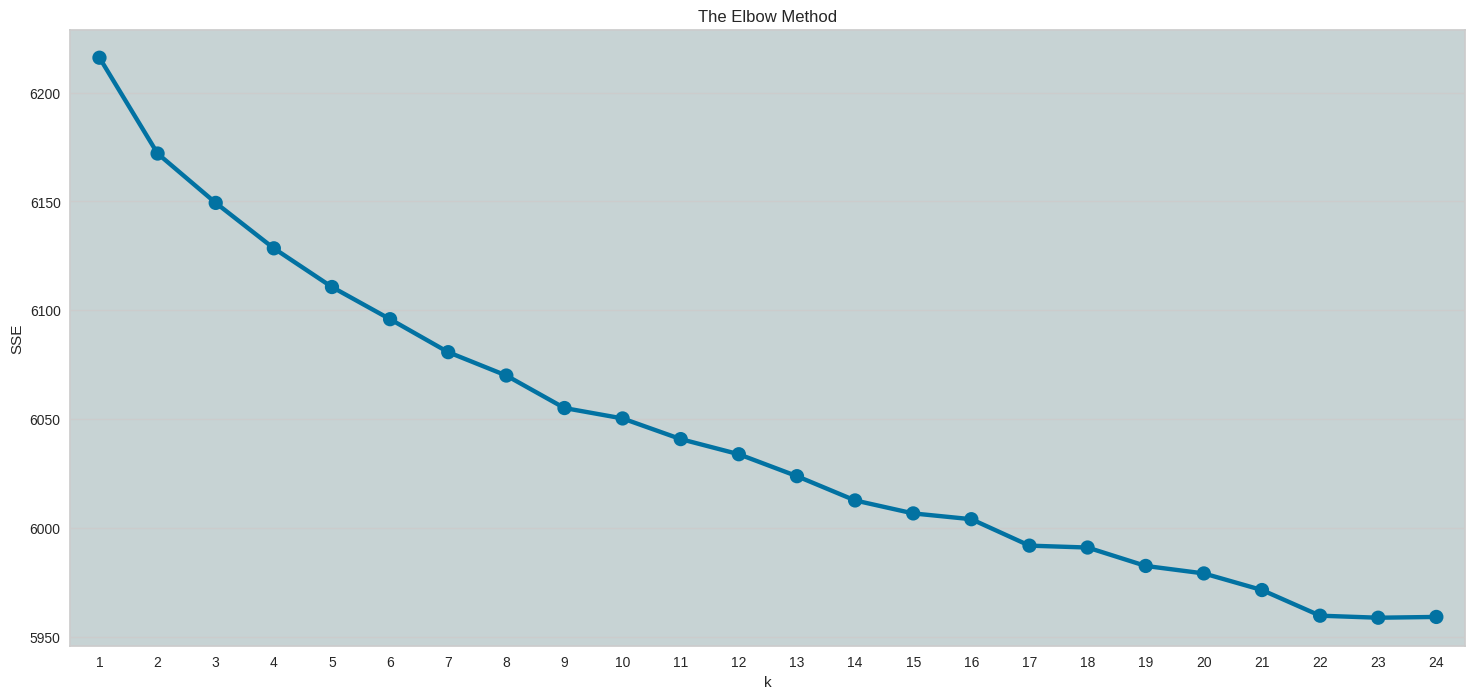

In [64]:
# Initializing an empty dictionary to store the sum of squared errors (SSE) for each k
sse = {}

# Rinning a loop for k in the range of 1 to 24
for k in range(1, 25):

    # Initializing a KMeans object with k clusters and fit it to the transformed data
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_pca)
    # Storing the SSE for this value of k in the dictionary
    sse[k] = kmeans.inertia_


fig, ax = plt.subplots(figsize = (18, 8))

ax.set_facecolor("#C7D3D4")
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
# Using Seaborn to create a pointplot of SSE vs. k
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))

plt.show()

In [65]:
# Initializing an empty dictionary to store the silhouette coefficients for each k
silhouette_coefficients = {}

# Looping over values of k from 2 to 24
for k in range(2, 25):

    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_pca)
    # Calculate the silhouette coefficient for this value of k and store it in the dictionary
    silhouette_coefficients[k] = silhouette_score(X, kmeans.labels_)

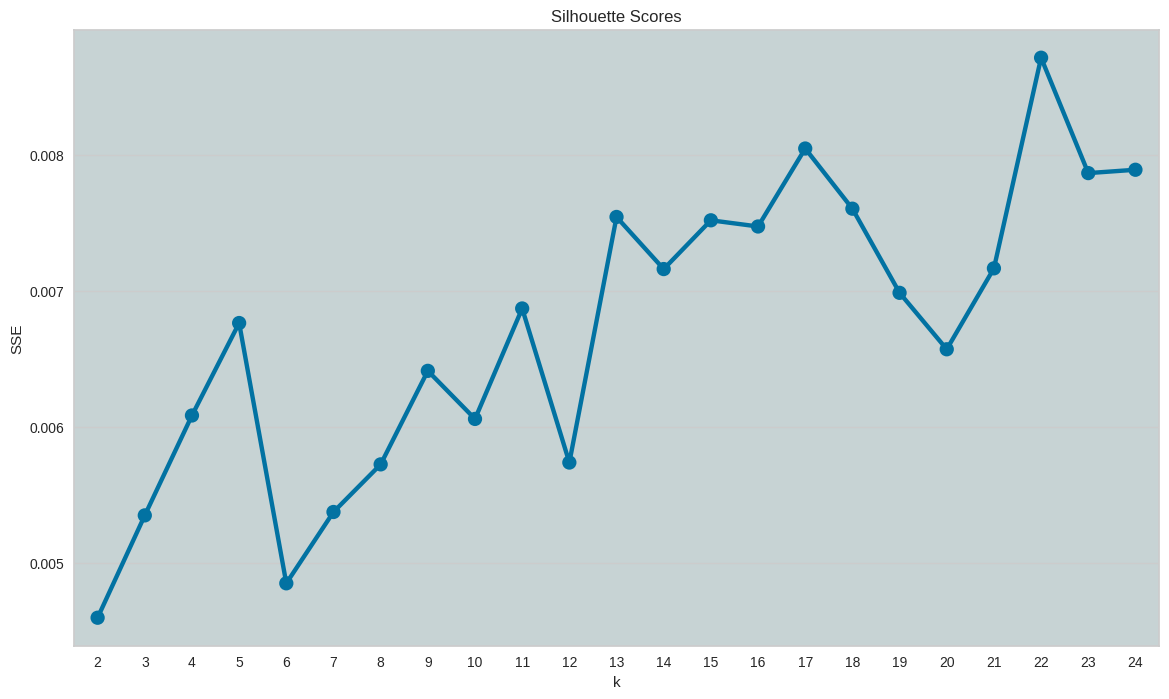

In [66]:
fig, ax = plt.subplots(figsize = (14,8))

ax.set_facecolor("#C7D3D4")
# Plotting the pointplot
sns.pointplot(x = list(silhouette_coefficients.keys()), y = list(silhouette_coefficients.values()))

plt.title("Silhouette Scores")
plt.xlabel("k"); plt.ylabel("SSE")

plt.show()

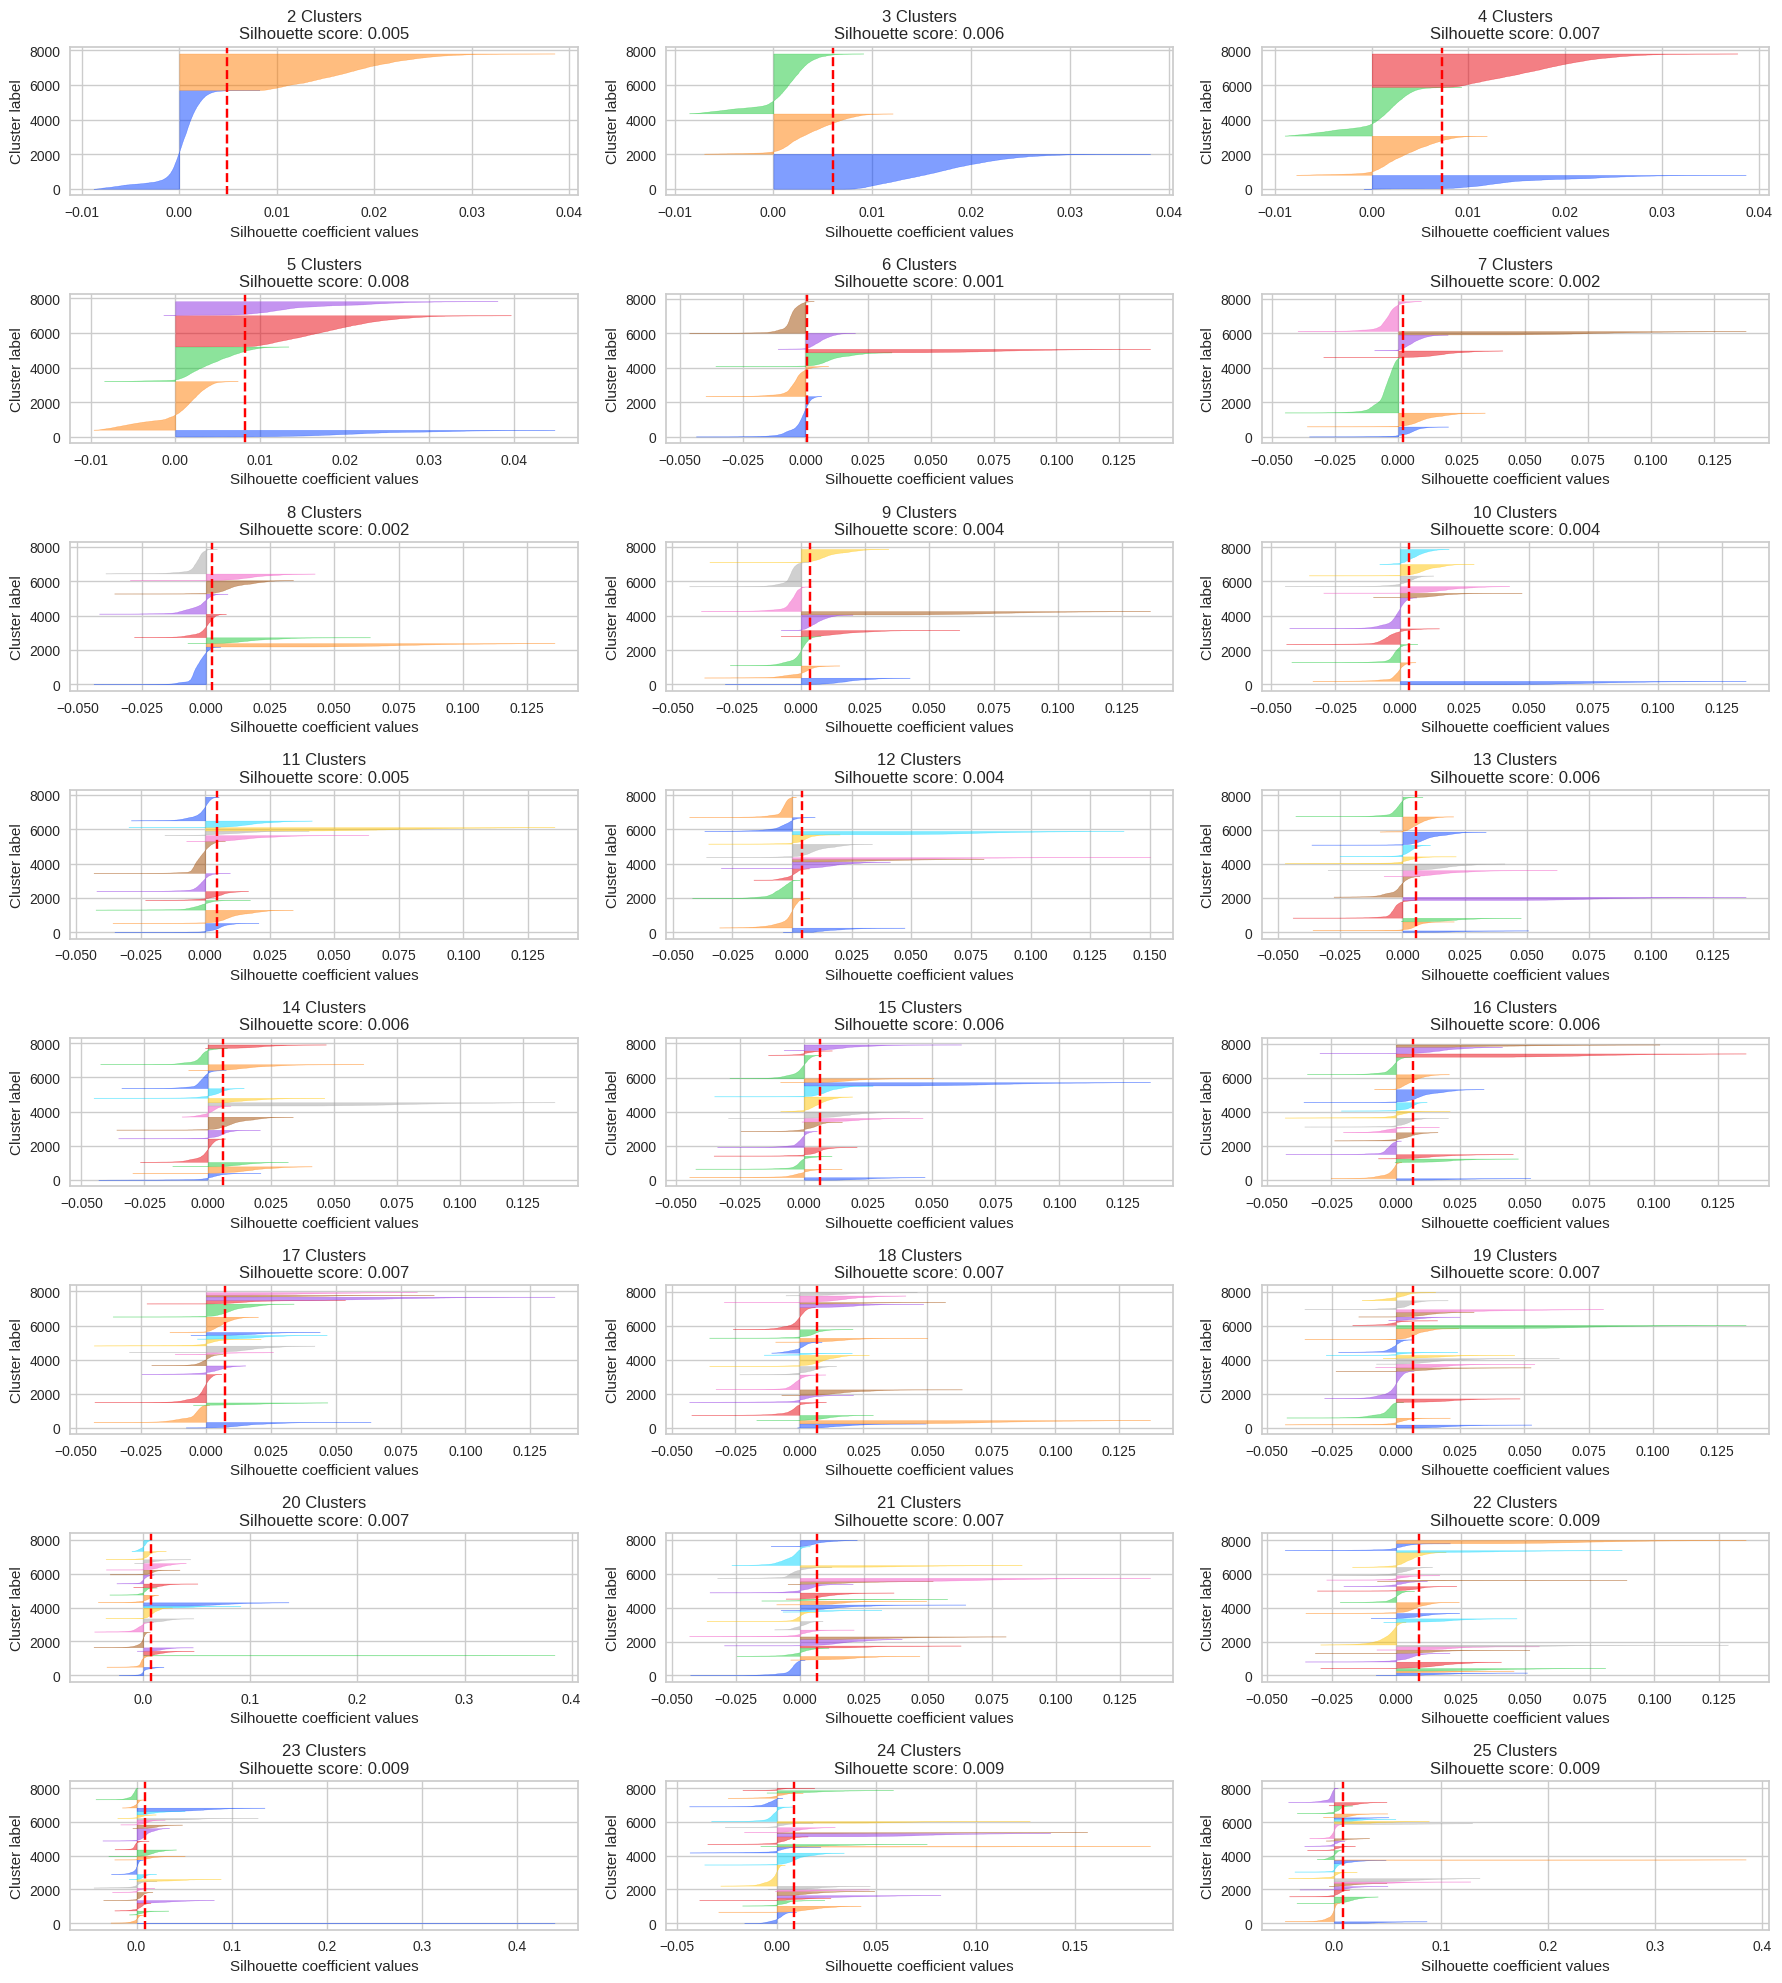

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer

# Defining a color palette to use for the clusters
palette = sns.color_palette("bright", 30)

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(8, 3, figsize=(18, 20))

# Running a loop
for i in range(2, 26):
   # Calculating the row and column indices for the current subplot
    row = (i - 2) // 3
    col = (i - 2) % 3

# Initializing a KMeans object with k clusters, fit it to the transformed data, and get the cluster labels
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_pca)
    cluster = km.labels_

# Setting the title of the subplot to the number of clusters and the silhouette score for the current k
    visualizer = SilhouetteVisualizer(km, colors=palette[:len(set(cluster))], ax=axes[row, col])
    visualizer.fit(X_pca)

# Setting the x and y axis labels for the current subplot
    axes[row, col].set_title(str(i) + ' Clusters\nSilhouette score: ' + str(round(silhouette_score(X_pca, cluster), 3)))
    axes[row, col].set_xlabel('Silhouette coefficient values')
    axes[row, col].set_ylabel('Cluster label')

plt.tight_layout()
plt.show()


In [68]:
# Clustering data on the 22 Clusters
from sklearn.cluster import KMeans
# Creating an instance of the KMeans algorithm with 22 clusters and a random state of 18
model_tf = KMeans(n_clusters = 22,random_state=18)
# Fitting the KMeans model
model_tf.fit(X_pca)

KMeans(n_clusters=22, random_state=18)

In [69]:
# Retrieving the labels assigned to each data point by the KMeans model
labels_tf = model_tf.labels_
# Retrieving the cluster centers of the KMeans model
cluster_center_tf=model_tf.cluster_centers_

In [70]:
labels_tf

array([17, 21, 18, ..., 12,  4, 12], dtype=int32)

In [71]:
from sklearn import metrics
# Computing the silhouette score of the KMeans model
silhouette_score_tf = metrics.silhouette_score(X_pca, labels_tf, metric='euclidean')

In [72]:
silhouette_score_tf

0.007881675796859082

In [73]:
cluster_center_tf

array([[-2.81823425e-02, -6.23524938e-02,  1.53445490e-03, ...,
        -7.89752388e-05, -3.93009729e-04,  1.68270159e-04],
       [-3.39590737e-02,  5.91196287e-02, -8.73973839e-02, ...,
         1.12689025e-04,  1.41907258e-04, -1.03208834e-05],
       [-2.72216790e-02,  3.34848666e-02, -5.16080951e-02, ...,
         4.71821115e-04, -1.07102513e-04,  1.46017911e-04],
       ...,
       [-6.34764166e-02, -1.32071612e-01,  3.26557288e-02, ...,
        -4.22431240e-05, -2.51134921e-04, -5.19431795e-04],
       [ 1.93718815e-01, -8.63589969e-02,  2.25429031e-02, ...,
         8.04514203e-05,  3.09935819e-04, -6.81192146e-05],
       [ 7.26025684e-02, -2.75323783e-02,  1.32151641e-02, ...,
         5.00594978e-05,  2.93506388e-04, -3.11726626e-05]])

In [74]:
# Creating a copy of the original data and adding a new column with the cluster labels assigned by the KMeans model
df1 = data.copy()
df1['kmeans_clus_labels'] = model_tf.labels_

In [75]:
# Finding the number of data points in each cluster
df1.groupby(['kmeans_clus_labels'])['clustering_attributes'].count()

kmeans_clus_labels
0      110
1      375
2      479
3       15
4      201
5       47
6       94
7      390
8      646
9      161
10     248
11     212
12     205
13     492
14      88
15    1215
16     636
17     684
18     870
19     243
20     188
21     188
Name: clustering_attributes, dtype: int64

In [76]:
# create a DataFrame with the cluster labels and counts
cluster_counts = df1.groupby(['kmeans_clus_labels'])['clustering_attributes'].count()
cluster_df = pd.DataFrame({'Cluster number': cluster_counts.index, 'Number of points': cluster_counts.values})

# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=cluster_df['Cluster number'], y=cluster_df['Number of points'], marker={'color': 'rgb(158,202,225)', 'line': {'color': 'rgb(8,48,107)', 'width': 1}}, opacity=0.6)])
fig.update_layout(title='KMeans cluster points', xaxis_title='Cluster number', yaxis_title='Number of points', plot_bgcolor='white', font=dict(size=12, color='black'), margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

In [77]:
def visualize_wordcloud(cluster_label,cluster_number, text_col='clustering_attributes',figsize=(10,10)):
    """
    Generates a word cloud for a specific cluster label in a DataFrame.

    Args:
        cluster_label: str, label of the cluster to visualize
        cluster_number: int, number of the cluster to visualize
        text_col: name of the column containing the list of items to generate the word cloud
        figsize: size of the figure

    """

    # filter the DataFrame to only include the specified cluster label
    cluster_df = df1[df1[cluster_label] == cluster_number]

    # concatenate all the items from the list in the documents in the cluster
    text = ' '.join([item for item_list in cluster_df[text_col].values for item in item_list])

    # generate the word cloud
    wordcloud = WordCloud(background_color='black',max_words=50).generate(text)

    # plot the word cloud
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_label}")
    plt.show()

### ML Model - 2

**AGGLOMERATIVE CLUSTERING**

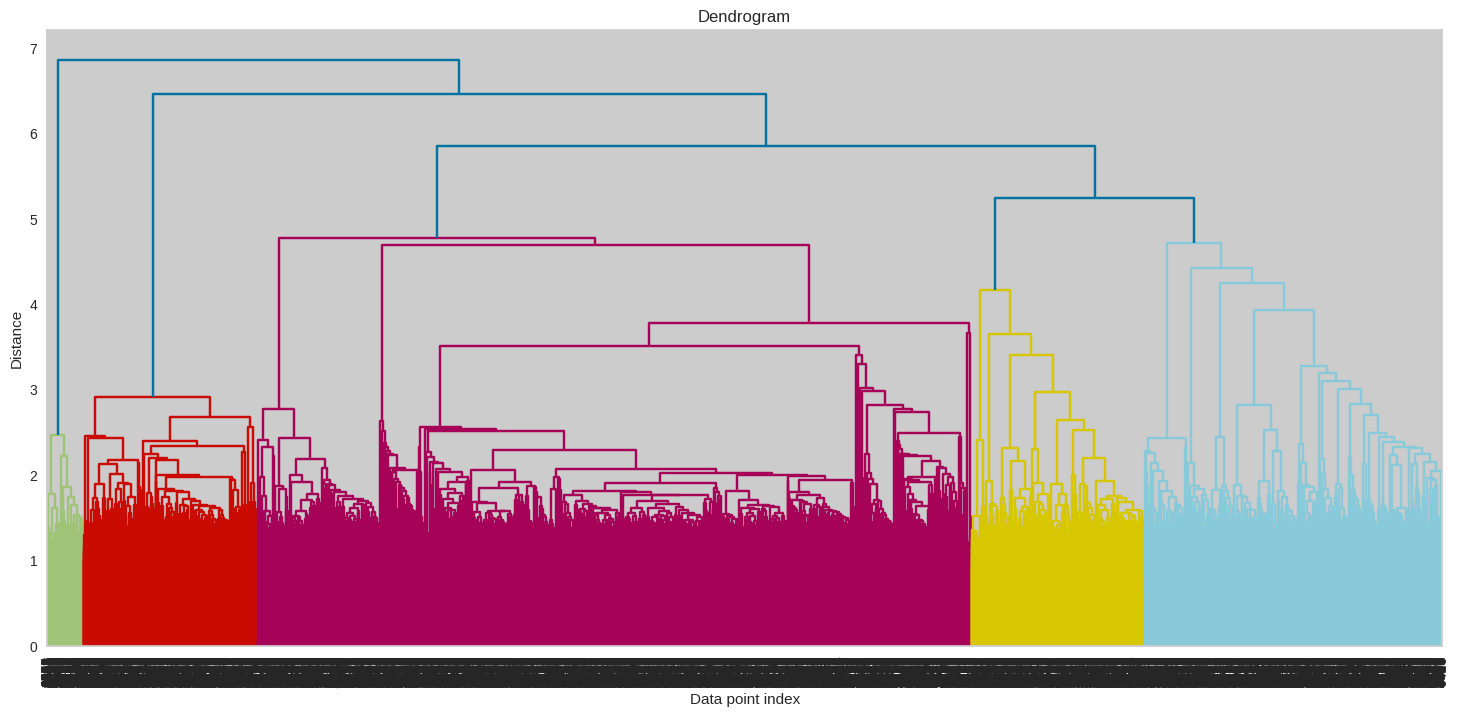

In [78]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z, leaf_font_size=10)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

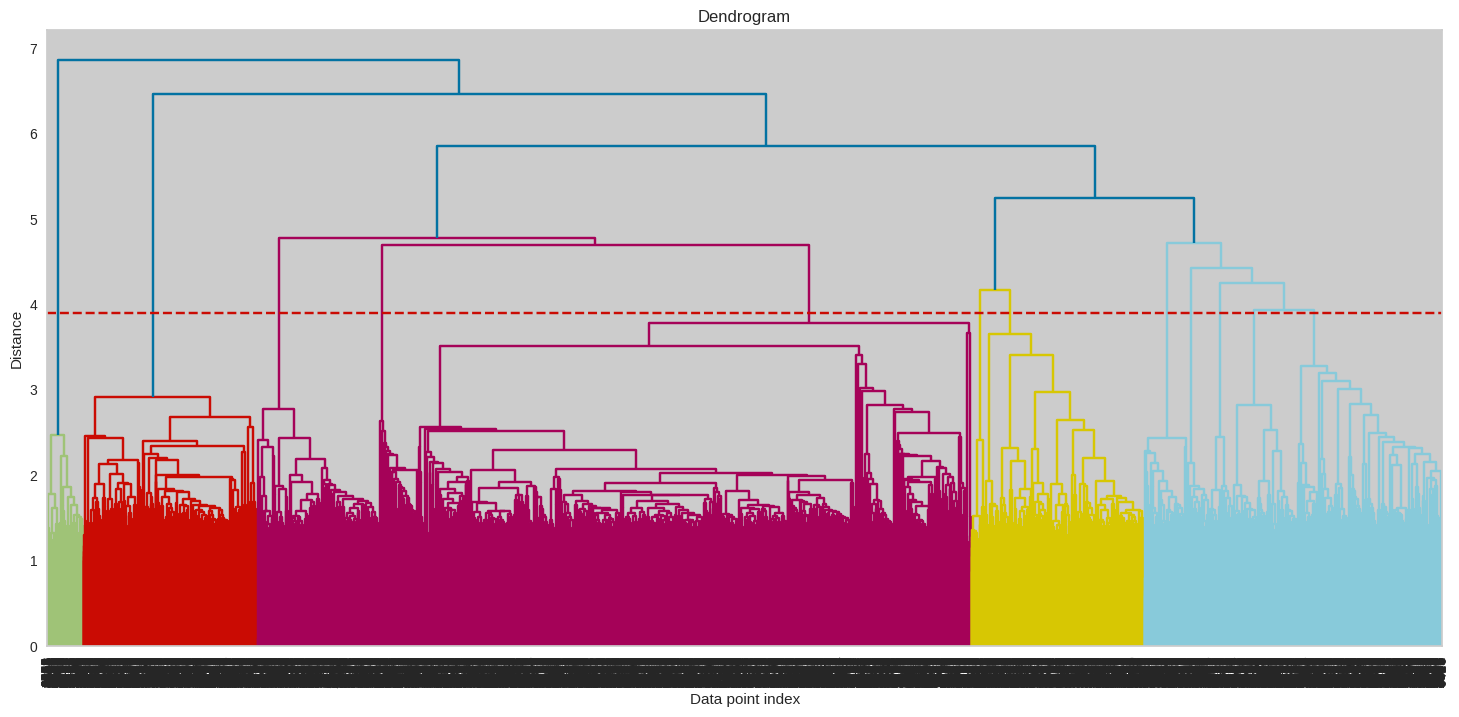

In [79]:
# calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z, leaf_font_size=10)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.axhline(y= 3.9, color='r', linestyle='--')
plt.show()

**I am taking threshold at a distance of 3.9 and taking 12 clusters according to this threshold**

In [80]:
# Applying agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_pca)

array([ 1,  5,  9, ..., 11,  1, 11])

In [81]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster_labels'] = cluster.labels_

In [82]:
import plotly.graph_objects as go
import pandas as pd

# create a DataFrame with the cluster labels and counts
cluster_counts = df1.groupby(['hierarchical_cluster_labels'])['clustering_attributes'].count()
cluster_df = pd.DataFrame({'Cluster number': cluster_counts.index, 'Number of points': cluster_counts.values})

# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=cluster_df['Cluster number'], y=cluster_df['Number of points'], marker={'color': 'rgb(158,202,225)', 'line': {'color': 'rgb(8,48,107)', 'width': 1}}, opacity=0.6)])
fig.update_layout(title='Hierarchical cluster points', xaxis_title='Cluster number', yaxis_title='Number of points', plot_bgcolor='white', font=dict(size=12, color='black'), margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

**WORLDCLOUDS FOR DIFFERENT CLUSTERS**

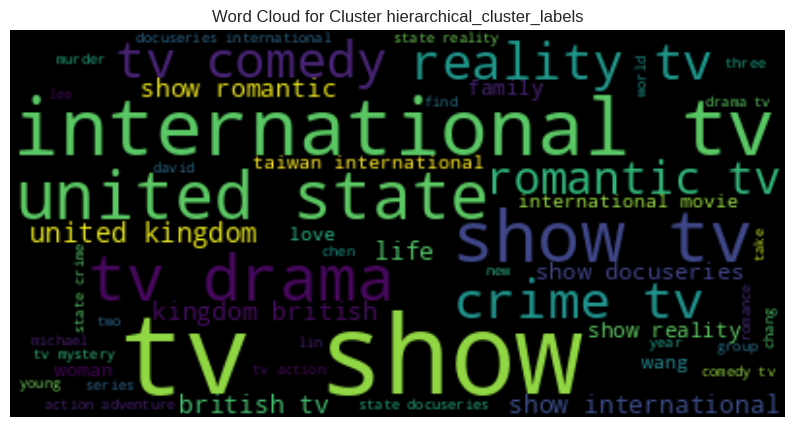

In [83]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 1)

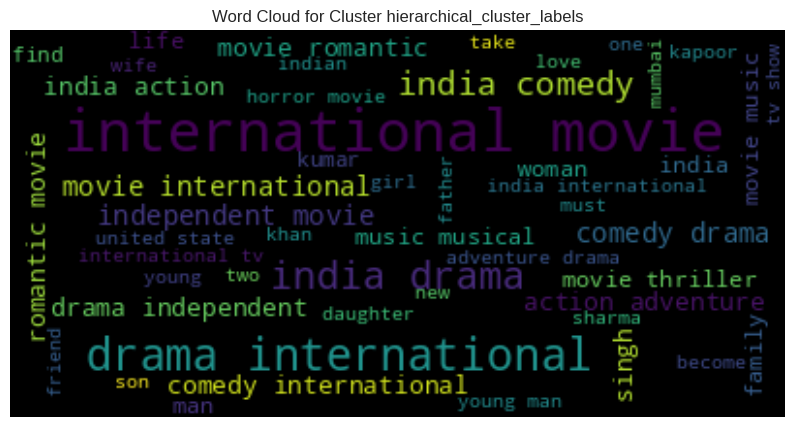

In [84]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 2)

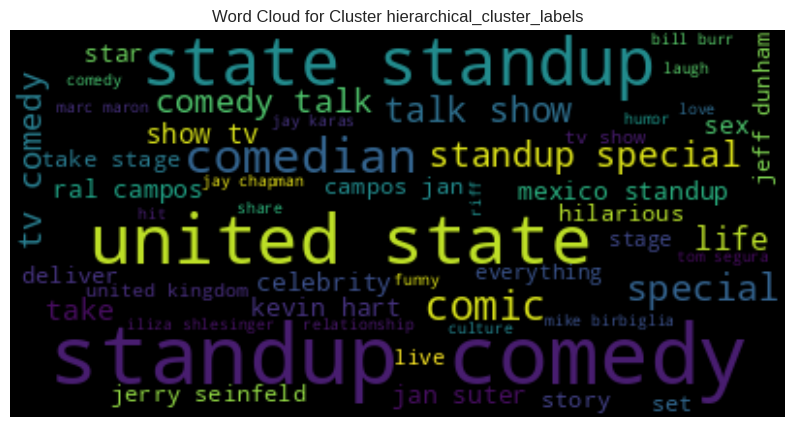

In [85]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 3)

**MAKING A CONTENT BASED RECOMMENDER SYESTEM**

In [88]:
recommender_df = df.copy()

In [89]:
# Fillling all missing values in recommender_df with empty string
recommender_df.fillna("",inplace = True)

In [90]:
# Creating a list of feature in whuch we have to make recommendation
features=['title','director','cast','listed_in','description']

In [91]:
# Creating a dataframe of all these features
recommender_df = recommender_df[features]

In [92]:
# Writting a function that will remove apaces and convert them to lowercase
def clean_data(x):
    return ''.join([word for word in x.split() if word != '']).lower()

In [93]:
# Applying clean data function
for elem in features:
  recommender_df[elem] = recommender_df[elem].apply(clean_data)

In [94]:
# Creating a feature which is a combination of all the features that will be used to make recommendation
recommender_df['feature'] = recommender_df['title'] + " " + recommender_df['director'] + " " + recommender_df['cast'] + " " + recommender_df['listed_in']+ " " + recommender_df['description']

In [95]:
# Importing the CountVectorizer and cosine_similarity functions from the scikit-learn library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creatting a CountVectorizer object with the stop_words parameter set to 'english'
count = CountVectorizer(stop_words='english')

# Use the CountVectorizer object to transform the 'feature' column of the recommender_df dataframe into a matrix of token counts
count_matrix = count.fit_transform(recommender_df['feature'])

# Calculating the cosine similarity between all pairs of documents in the count_matrix, and store the results in the similarity matrix
cos_sim = cosine_similarity(count_matrix, count_matrix)

In [96]:
count_matrix

<7787x68302 sparse matrix of type '<class 'numpy.int64'>'
	with 118498 stored elements in Compressed Sparse Row format>

In [97]:
count_matrix.shape

(7787, 68302)

In [98]:
# Displaying cos_sim matrix
cos_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06917145,
        0.        ],
       [0.        , 1.        , 0.070014  , ..., 0.08703883, 0.        ,
        0.        ],
       [0.        , 0.070014  , 1.        , ..., 0.07312724, 0.        ,
        0.        ],
       ...,
       [0.        , 0.08703883, 0.07312724, ..., 1.        , 0.        ,
        0.30151134],
       [0.06917145, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30151134, 0.        ,
        1.        ]])

The cosine similarity between two movies is a measure of how similar their feature vectors are. It ranges from -1 to 1, where a value of 1 indicates that the movies have identical feature vectors, a value of -1 indicates that the movies have completely opposite feature vectors, and a value of 0 indicates that the movies have no shared features.The diagonal elements of the matrix represent the similarity between a movie and itself, which will always be 1.

In [99]:
cos_sim.shape

(7787, 7787)

In [100]:
recommender_df.head(3)

,title,director,cast,listed_in,description,feature
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...,"3% joãomiguel,biancacomparato,michelgomes,rod..."
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap...","7:19 jorgemichelgrau demiánbichir,héctorbonill..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers...","23:59 gilbertchan teddchan,stellachung,henleyh..."


In [101]:
# Creating a pandas Series object where the index is the 'title' column of the recommender_df dataframe,
# and the values are the corresponding row indices in the dataframe
indices = pd.Series(recommender_df.index, index=recommender_df['title'])

In [102]:
indices

title
3%                                     0
7:19                                   1
23:59                                  2
9                                      3
21                                     4
                                    ... 
zozo                                7782
zubaan                              7783
zulumaninjapan                      7784
zumbo'sjustdesserts                 7785
zztop:thatlittleol'bandfromtexas    7786
Length: 7787, dtype: int64

In [103]:
from operator import itemgetter

In [104]:
def get_recommendations(title):
    try:
        title=title.replace(' ','').lower()
        idx = indices[title]

        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = [(i, j) for i, j in enumerate(cos_sim[idx])]

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=itemgetter(1), reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return df['title'].iloc[movie_indices]
    except KeyError:
        return "This movie is not available on Netflix"

In [105]:
get_recommendations('Special 26')

4841                             Phamous
6836              The Royal Bengal Tiger
251                          A Wednesday
355                              Aiyaary
2339                                Game
3027                       Interrogation
5047                           Raajneeti
891                      Bhool Bhulaiyaa
1611    Dark Chocolate (Bengali Version)
4380                        Naam Shabana
Name: title, dtype: object

In [106]:
get_recommendations('Dangal')

5464    Secret Superstar
5954    Taare Zameen Par
3813                Ludo
99            3 Heroines
6878     The Sky Is Pink
7307              Ultras
3107                Jada
3912                Mann
2240        Forever Pure
2552         Gun Runners
Name: title, dtype: object

In [107]:
get_recommendations('Fast & Furious')

'This movie is not available on Netflix'

# **Conclusion**

* Around 69% content available on Netflix are Movie and 31% are TV Shows.
* Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14".
* from 2010 to 2019 netflix has shown tremendous increase in number of shows i.e 1 show in 2010 to 2153 show in 2019.
* From 2001 to 2018, the number of shows released by Netflix increased every year. However, in 2019 and 2020, there was a slight decline, which is likely due to the impact of COVID-19. As we know, there were lockdowns across the globe during that time.
* The top three months in a calendar year during which the most number of shows are added to the platform are December, followed by October, and then January.
* Majority of content available on the popular streaming platform Netflix is produced in the United States, followed by content produced in India and the United Kingdom.
* Majority of content available on Netflix is suitable for adult audiences, followed by teenagers, older kids, and kids.
* Drama is the most popular genre of content available on Netflix, followed by comedies and documentaries. Action and adventure are also popular genres, with many of the platform's most-watched shows and movies falling under this category.
* Grey's Anatomy has most number of seasons i.e 16 seasons in TV Shows category while Supernatural & NCIS have equal number of seasons i.e 15 seasons.
* The histogram of duration for movies is approximately symmetric or slightly skewed to the right. This means that the distribution of movie durations is relatively balanced, with a slight tendency towards longer movies.
* In overall category including content from all countries top three directors are Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas.
* Overall Alastair Fothergill is the top director of TV shows on Netflix.
* Top 3 directors of movies i.e., "Raul Campos, Jan Suter", "Marcus Raboy", and "Jay Karas" create content that is mostly suitable for adult audiences.One Popular indian director "David Dhawan" made content that are suitable for teens.
* Top 3 movie directors, Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas, create content that is mostly related to stand-up comedy.
* The average length of movies has seen an upward trend till around the year 1965, after which there has been a decline. This insight can help streaming platforms like Netflix in making informed decisions related to the content they acquire and produce.
* David Dhawan is most popular director in india follwed by Anurag Kashyap.
* Jay karas and Marcus Raboy are two most popular director in USA.
* Anupam Kher is top actor in india.
* Adam Sandler and Samuel L.Jackson are two most popular actor in USA.
* Nizar Shafi,Patrick Graham,Soumendra Padhi,Sudha Kongara and Vignesh Shivam are among top TV Shows director in india.
* Radhika Apte,Manav Kaul,Rahman,Havish are among top TV Shows actor in india.
* Stan Lathan and Rob Seidenglanz are two top TV Shows director in USA.
* Dave Chappelle and Keiynan Lonsdale are two top TV Shows actor in USA.
* Features that are used to make clusters are director,cast,country,genres and description.
* Text vectorization is done using term frequency-inverse document frequency (tf-idf) results in a sparse matrix of shape 7777 rows by 20000 columns, where each row corresponds to a document in the corpus and each column corresponds to a unique term in the vocabulary.
* To reduce the dimensionality of the high-dimensional data represented by a sparse matrix of shape 7777 by 20000, principal component analysis (PCA) was applied while retaining 80% of the variance in the data. This resulted in a reduced feature space of 3500 dimensions, which captures the most important patterns and structures in the original data.
* For K means clustering after applying clustering techniques such as silhouette score and elbow method to the text data, it was determined that the optimal number of clusters for the data is 22. To visualize the clustering results, a bar chart was created to show the distribution of documents among the 22 clusters. Moreover, word clouds were generated for each cluster to highlight the most frequent terms that appear in the documents within each cluster.
* In agglomerative clustering, a distance threshold of 3.9 was chosen to form 12 clusters from the text data. Each cluster was visualized through a bar chart displaying the number of documents in each cluster and word clouds that represent the most common terms used in the documents within each cluster.
* Finally a content-based recommender system was built using cosine similarity. A function was created that takes a movie name as input and recommends similar movies based on their similarity scores with the input movie.The similarity scores were computed using cosine similarity between the vectorized representations of the movie plots.The recommended movies are those with the highest similarity scores to the input movie.